# Tutorial 4

## Task 1: Time-domain analysis

In [1]:
# Données
freq_e = 20e3
nb_signals = 12

N1=20
N2=21
GMF=330

GMFs = [338.7, 340, 330.58, 334.83, 338, 338.33, 337.5, 338, 345.44, 345.66, 334.22, 335.25]

### a) For each of these signals, sketch the vibration signal with respect to time

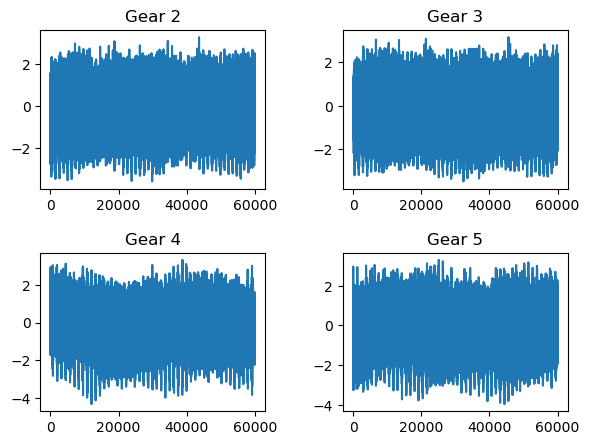

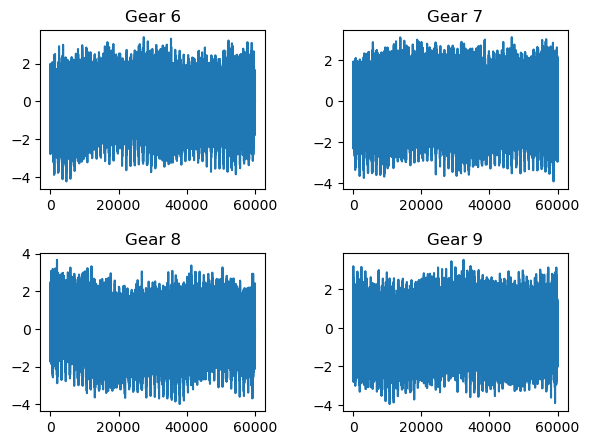

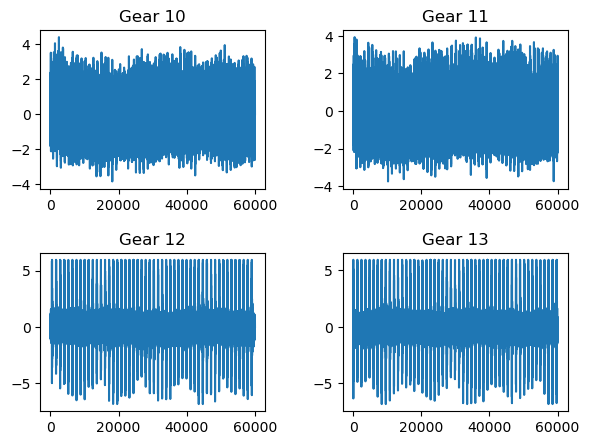

In [2]:
import scipy.io
import matplotlib.pyplot as plt

signals = scipy.io.loadmat("vib_gear.mat")

for i in range(3):
    fig, axs = plt.subplots(2,2)
    fig.tight_layout(pad=2.5)
    
    index = 2+i*4
    axs[0, 0].plot(signals["gear"+str(index)])
    axs[0, 0].set_title("Gear "+str(index))
    axs[0, 1].plot(signals["gear"+str(index+1)])
    axs[0, 1].set_title("Gear "+str(index+1))
    axs[1, 0].plot(signals["gear"+str(index+2)])
    axs[1, 0].set_title("Gear "+str(index+2))
    axs[1, 1].plot(signals["gear"+str(index+3)])
    axs[1, 1].set_title("Gear "+str(index+3))
plt.show()

### b) Describe how the amplitude and the shape of these signals change with the records.

On remarque que l'amplitude diffère d'un signal à l'autre, notamment pour les deux derniers où  des piques d'amplitude ressortent de façon plus qu'évidente.

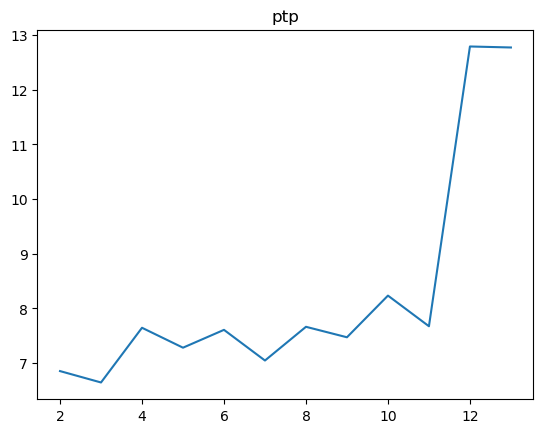

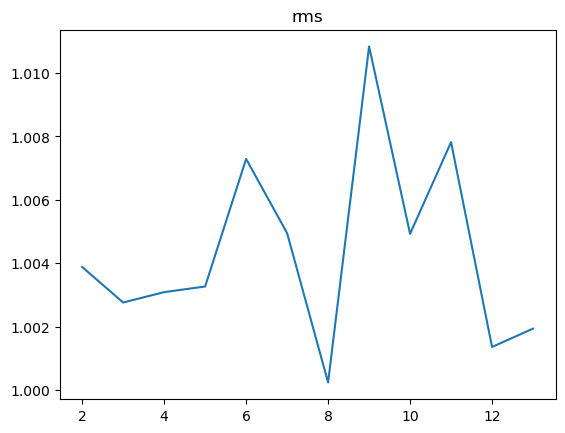

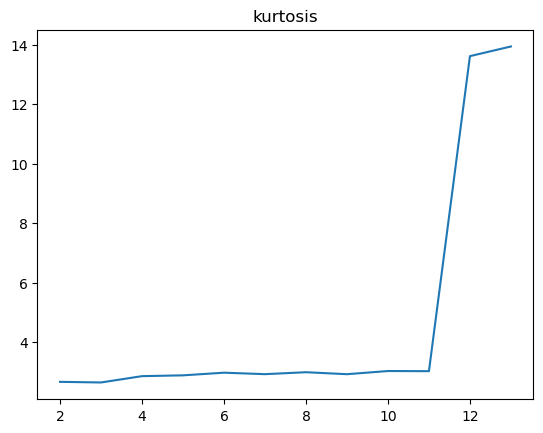

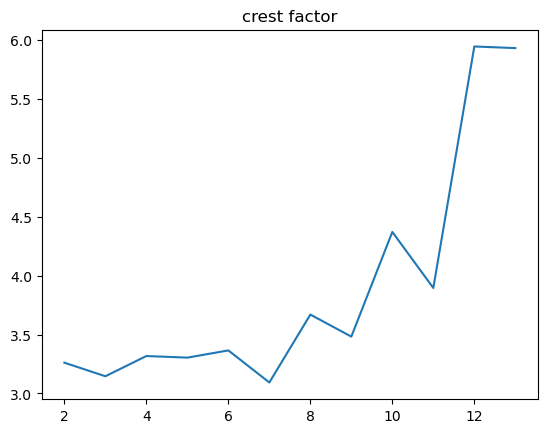

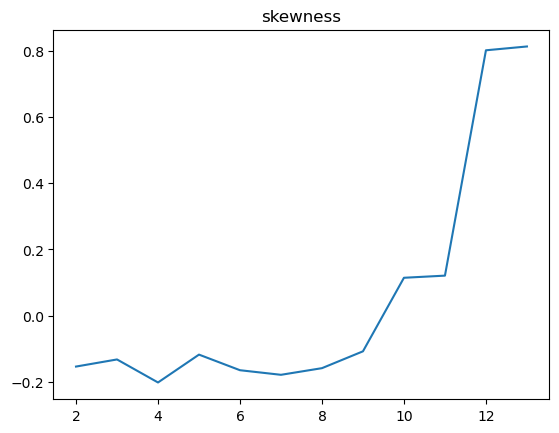

In [3]:
import numpy as np
import scipy.stats

ptp = []
rms = []
kurtosis = []
crest_factor = []
skewness = []

for i in range(2,14):
    ptp.append(np.ptp(signals["gear"+str(i)]))
    rms.append(np.sqrt(np.mean(signals["gear"+str(i)] ** 2)))
    kurtosis.append(scipy.stats.kurtosis(signals["gear"+str(i)], fisher=False))
    crest_factor.append(max(signals["gear"+str(i)])/rms[-1])
    skewness.append(scipy.stats.skew(signals["gear"+str(i)]))

# print("ptp: " + str(ptp))
# print("rms: " + str(rms))
# print("kurtosis: " + str(kurtosis))
# print("crest factor: " + str(crest_factor))
# print("skewness: " + str(skewness))

indicators = {"ptp": ptp, "rms": rms, "kurtosis": kurtosis, "crest factor": crest_factor, "skewness": skewness}

for indicator in indicators.keys():
    fig, axs = plt.subplots(1,1)
    axs.plot(range(2,14), indicators[indicator])
    axs.set_title(indicator)
plt.show()

### c) Compute the approximate periods T<sub>1</sub> and T<sub>2</sub> (s) of gear 1 and 2 (considering GMF = 330Hz)

In [4]:
f1 = GMF / N1
T1 = 1/f1
f2 = GMF / N2
T2 = 1/f2

print("T1 = {:.5f}s".format(T1))
print("T2 = {:.5f}s".format(T2))

T1 = 0.06061s
T2 = 0.06364s


### d) Sketch the signals in a) over three periods of the first gear (i.e. from t=0 to t=3T<sub>1</sub>). Comment the result.

20000 points sont echantillonnés en 1 seconde, ainsi on aura pour 3 périodes:

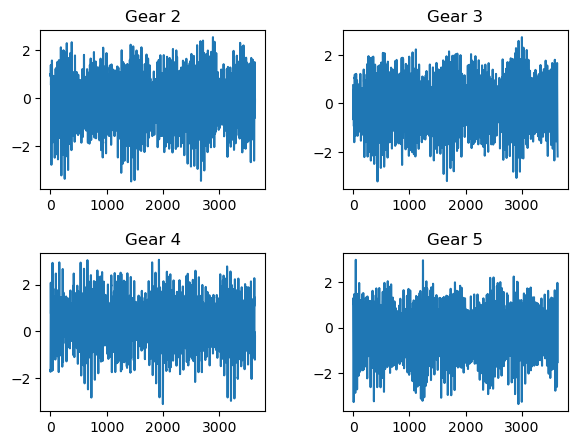

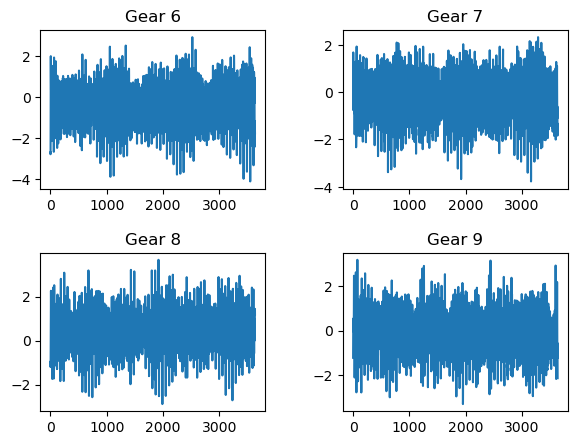

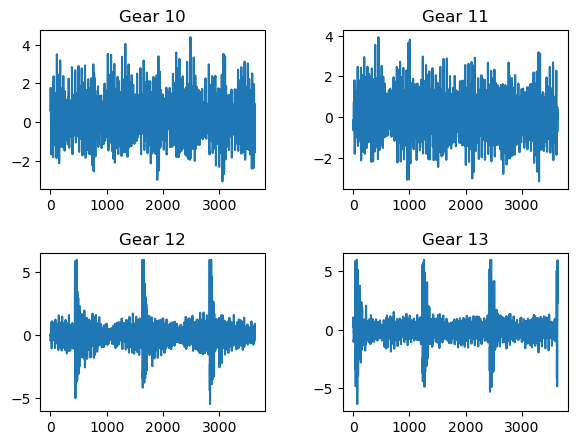

In [5]:
t = 3*T1*freq_e

for i in range(3):
    fig, axs = plt.subplots(2,2)
    fig.tight_layout(pad=2.5)
    
    index = 2+i*4
    axs[0, 0].plot(signals["gear"+str(index)][:int(t)])
    axs[0, 0].set_title("Gear "+str(index))
    axs[0, 1].plot(signals["gear"+str(index+1)][:int(t)])
    axs[0, 1].set_title("Gear "+str(index+1))
    axs[1, 0].plot(signals["gear"+str(index+2)][:int(t)])
    axs[1, 0].set_title("Gear "+str(index+2))
    axs[1, 1].plot(signals["gear"+str(index+3)][:int(t)])
    axs[1, 1].set_title("Gear "+str(index+3))
plt.show()

On remarque qu'il y a, sur les signaux repérés au préalable comme présentant le défaut repéré, qu'il y a exactement 3 piques parasites sur 3 périodes du premier engrenage, ce qui peut nous amener à conclure que le défaut se trouve sur le premier engrenage.

### e) From what you see, in which day the fault start to appear?

Le défaut semble apparaître au jour 9 de façon mineure (apparition de piques marqués) et réellement impacter le système de façon majeure à partir du jour 12.

### f) How the mechanical defects manifest in the vibration signal?

L'usure des engrenages a probablement entraîné un mauvais alignement entre les dents de ceux-ci et provoqué une augmentation de l'amplitude des vibrations sur un instant de la rotation, faisant ainsi apparaitre des pics cycliques.

## Task 2: Frequency domain analysis

### a) Compute the (amplitude) spectra of the vibration signals and sketch them in the same manner as in the previous exercise. How is the shape of these spectra change with the progression of the fault.

C:\Users\USER\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


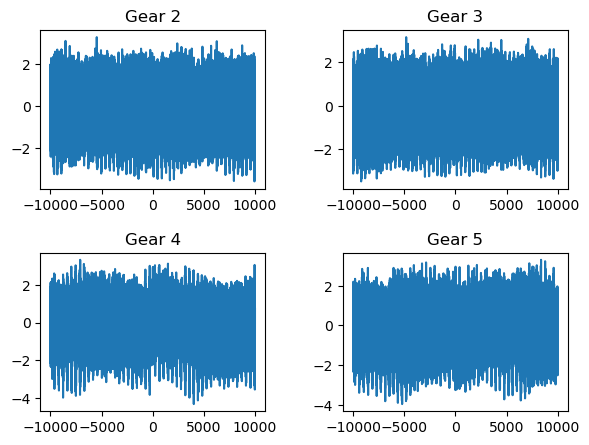

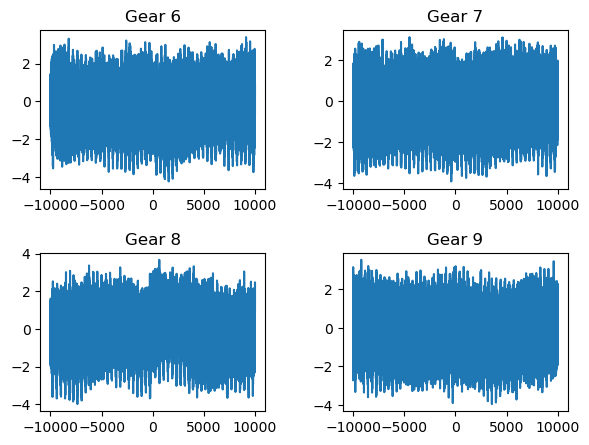

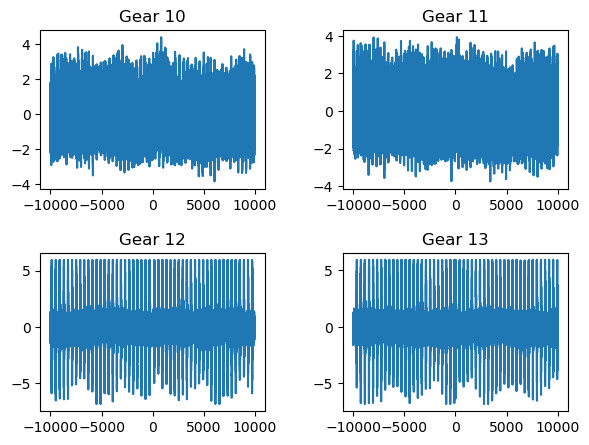

In [6]:
from scipy.fft import fft, fftfreq

xf = fftfreq(len(signals["gear2"]), 1 / freq_e)

for i in range(3):
    fig, axs = plt.subplots(2,2)
    fig.tight_layout(pad=2.5)
    
    index = 2+i*4
    axs[0, 0].plot(xf, fft(signals["gear"+str(index)]))
    axs[0, 0].set_title("Gear "+str(index))
    axs[0, 1].plot(xf, fft(signals["gear"+str(index+1)]))
    axs[0, 1].set_title("Gear "+str(index+1))
    axs[1, 0].plot(xf, fft(signals["gear"+str(index+2)]))
    axs[1, 0].set_title("Gear "+str(index+2))
    axs[1, 1].plot(xf, fft(signals["gear"+str(index+3)]))
    axs[1, 1].set_title("Gear "+str(index+3))
plt.show()

On remarque l'apparition sur les spectres l'apparition de fréquences anormales de forte amplitude.

### b) Display the same spectra in Decibel. In which case the progression of the defect is perceived better ? What is the usefulness of such a presentation in practice ?

C:\Users\USER\AppData\Local\Temp\ipykernel_30884\3861160767.py:6: RuntimeWarning: divide by zero encountered in log10
  axs[0, 0].plot(xf, 20*np.log10(fft(np.abs(signals["gear"+str(index)]))))
C:\Users\USER\AppData\Local\Temp\ipykernel_30884\3861160767.py:6: RuntimeWarning: invalid value encountered in multiply
  axs[0, 0].plot(xf, 20*np.log10(fft(np.abs(signals["gear"+str(index)]))))
C:\Users\USER\AppData\Local\Temp\ipykernel_30884\3861160767.py:8: RuntimeWarning: divide by zero encountered in log10
  axs[0, 1].plot(xf, 20*np.log10(fft(np.abs(signals["gear"+str(index+1)]))))
C:\Users\USER\AppData\Local\Temp\ipykernel_30884\3861160767.py:8: RuntimeWarning: invalid value encountered in multiply
  axs[0, 1].plot(xf, 20*np.log10(fft(np.abs(signals["gear"+str(index+1)]))))
C:\Users\USER\AppData\Local\Temp\ipykernel_30884\3861160767.py:10: RuntimeWarning: divide by zero encountered in log10
  axs[1, 0].plot(xf, 20*np.log10(fft(np.abs(signals["gear"+str(index+2)]))))
C:\Users\USER\AppData\Lo

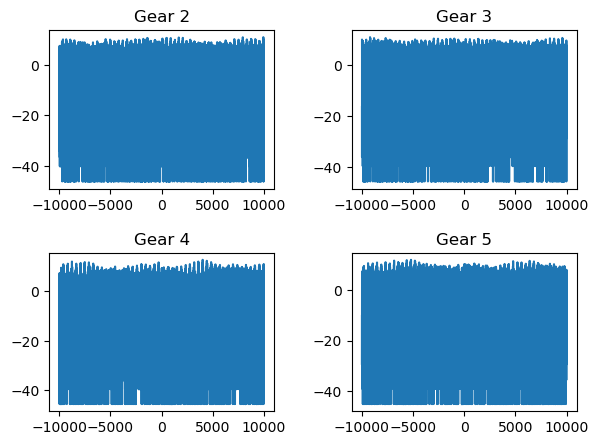

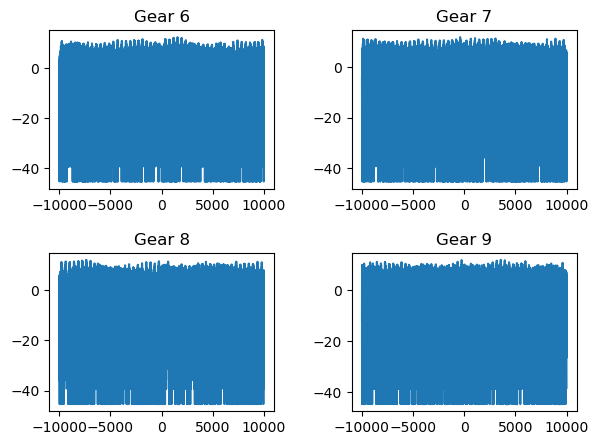

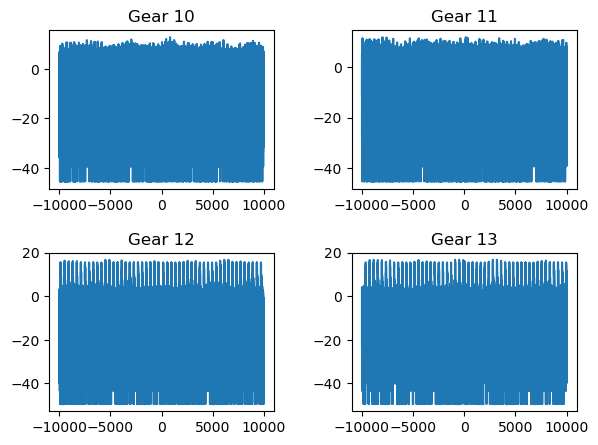

In [7]:
for i in range(3):
    fig, axs = plt.subplots(2,2)
    fig.tight_layout(pad=2.5)
    
    index = 2+i*4
    axs[0, 0].plot(xf, 20*np.log10(fft(np.abs(signals["gear"+str(index)]))))
    axs[0, 0].set_title("Gear "+str(index))
    axs[0, 1].plot(xf, 20*np.log10(fft(np.abs(signals["gear"+str(index+1)]))))
    axs[0, 1].set_title("Gear "+str(index+1))
    axs[1, 0].plot(xf, 20*np.log10(fft(np.abs(signals["gear"+str(index+2)]))))
    axs[1, 0].set_title("Gear "+str(index+2))
    axs[1, 1].plot(xf, 20*np.log10(fft(np.abs(signals["gear"+str(index+3)]))))
    axs[1, 1].set_title("Gear "+str(index+3))
plt.show()

La progression du défaut est mieux perçue ainsi, les pics devenant plus apparents. Une telle présentation est utile lorsque l'amplitude de la perturbation est bien plus grande que celle des vibrations normales.

### c) Perform a zoom around the meshing frequency (between GMF-100Hz and GMF+100Hz for example) for all the spectra. How the frequency content around the meshing frequency is changing ?

C:\Users\USER\AppData\Local\Temp\ipykernel_30884\2155363714.py:5: RuntimeWarning: divide by zero encountered in log10
  axs[0, 0].plot(xf, 20*np.log10(fft(np.abs(signals["gear"+str(index)]))))
C:\Users\USER\AppData\Local\Temp\ipykernel_30884\2155363714.py:5: RuntimeWarning: invalid value encountered in multiply
  axs[0, 0].plot(xf, 20*np.log10(fft(np.abs(signals["gear"+str(index)]))))
C:\Users\USER\AppData\Local\Temp\ipykernel_30884\2155363714.py:8: RuntimeWarning: divide by zero encountered in log10
  axs[0, 1].plot(xf, 20*np.log10(fft(np.abs(signals["gear"+str(index+1)]))))
C:\Users\USER\AppData\Local\Temp\ipykernel_30884\2155363714.py:8: RuntimeWarning: invalid value encountered in multiply
  axs[0, 1].plot(xf, 20*np.log10(fft(np.abs(signals["gear"+str(index+1)]))))
C:\Users\USER\AppData\Local\Temp\ipykernel_30884\2155363714.py:11: RuntimeWarning: divide by zero encountered in log10
  axs[1, 0].plot(xf, 20*np.log10(fft(np.abs(signals["gear"+str(index+2)]))))
C:\Users\USER\AppData\Lo

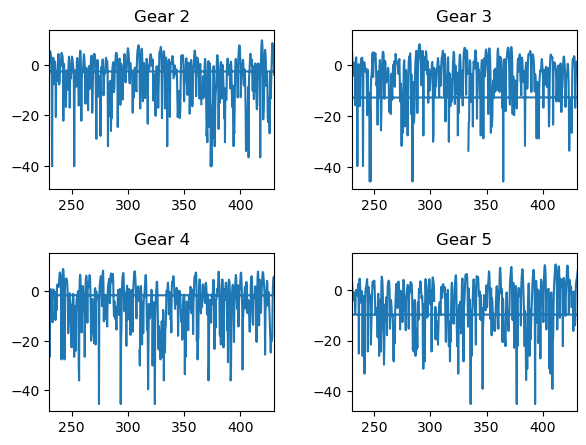

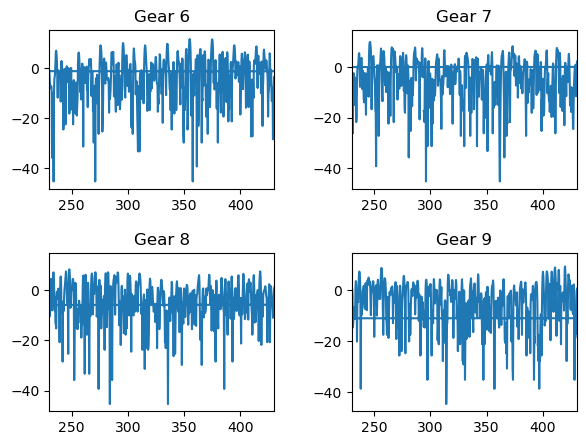

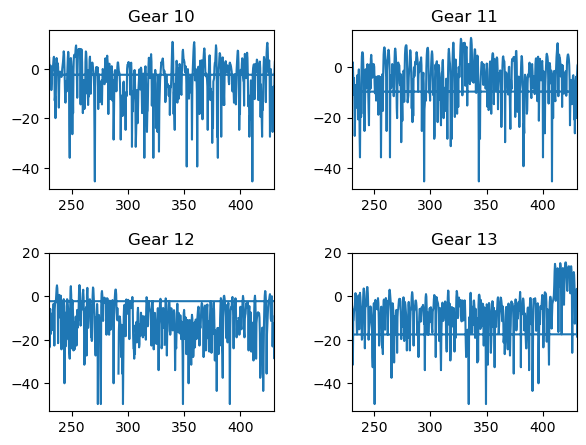

In [8]:
for i in range(3):
    fig, axs = plt.subplots(2,2)
    fig.tight_layout(pad=2.5)
    index = 2+i*4
    axs[0, 0].plot(xf, 20*np.log10(fft(np.abs(signals["gear"+str(index)]))))
    axs[0, 0].set_xlim(GMF-100, GMF+100)
    axs[0, 0].set_title("Gear "+str(index))
    axs[0, 1].plot(xf, 20*np.log10(fft(np.abs(signals["gear"+str(index+1)]))))
    axs[0, 1].set_xlim(GMF-100, GMF+100)
    axs[0, 1].set_title("Gear "+str(index+1))
    axs[1, 0].plot(xf, 20*np.log10(fft(np.abs(signals["gear"+str(index+2)]))))
    axs[1, 0].set_xlim(GMF-100, GMF+100)
    axs[1, 0].set_title("Gear "+str(index+2))
    axs[1, 1].plot(xf, 20*np.log10(fft(np.abs(signals["gear"+str(index+3)]))))
    axs[1, 1].set_xlim(GMF-100, GMF+100)
    axs[1, 1].set_title("Gear "+str(index+3))
plt.show()

### d) Repeat (c) for the second meshing frequency (between 2*GMF-100Hz and 2*GMF+100Hz for example)

C:\Users\USER\AppData\Local\Temp\ipykernel_30884\666779385.py:5: RuntimeWarning: divide by zero encountered in log10
  axs[0, 0].plot(xf, 20*np.log10(fft(np.abs(signals["gear"+str(index)]))))
C:\Users\USER\AppData\Local\Temp\ipykernel_30884\666779385.py:5: RuntimeWarning: invalid value encountered in multiply
  axs[0, 0].plot(xf, 20*np.log10(fft(np.abs(signals["gear"+str(index)]))))
C:\Users\USER\AppData\Local\Temp\ipykernel_30884\666779385.py:8: RuntimeWarning: divide by zero encountered in log10
  axs[0, 1].plot(xf, 20*np.log10(fft(np.abs(signals["gear"+str(index+1)]))))
C:\Users\USER\AppData\Local\Temp\ipykernel_30884\666779385.py:8: RuntimeWarning: invalid value encountered in multiply
  axs[0, 1].plot(xf, 20*np.log10(fft(np.abs(signals["gear"+str(index+1)]))))
C:\Users\USER\AppData\Local\Temp\ipykernel_30884\666779385.py:11: RuntimeWarning: divide by zero encountered in log10
  axs[1, 0].plot(xf, 20*np.log10(fft(np.abs(signals["gear"+str(index+2)]))))
C:\Users\USER\AppData\Local\T

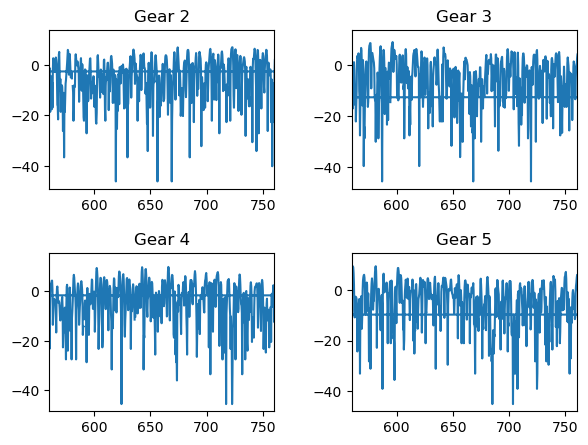

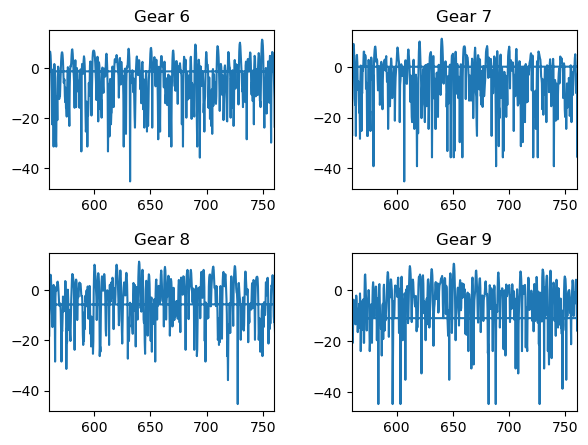

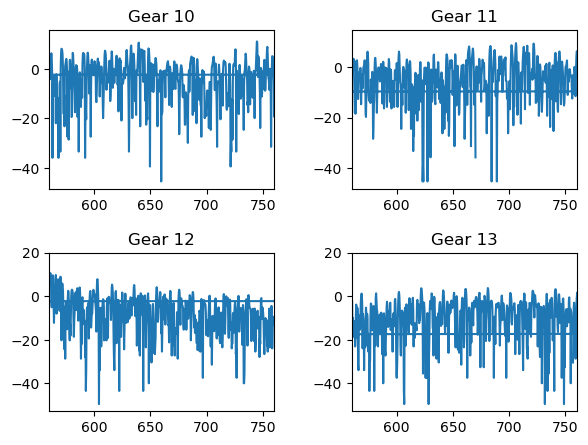

In [9]:
for i in range(3):
    fig, axs = plt.subplots(2,2)
    fig.tight_layout(pad=2.5)
    index = 2+i*4
    axs[0, 0].plot(xf, 20*np.log10(fft(np.abs(signals["gear"+str(index)]))))
    axs[0, 0].set_xlim(2*GMF-100, 2*GMF+100)
    axs[0, 0].set_title("Gear "+str(index))
    axs[0, 1].plot(xf, 20*np.log10(fft(np.abs(signals["gear"+str(index+1)]))))
    axs[0, 1].set_xlim(2*GMF-100, 2*GMF+100)
    axs[0, 1].set_title("Gear "+str(index+1))
    axs[1, 0].plot(xf, 20*np.log10(fft(np.abs(signals["gear"+str(index+2)]))))
    axs[1, 0].set_xlim(2*GMF-100, 2*GMF+100)
    axs[1, 0].set_title("Gear "+str(index+2))
    axs[1, 1].plot(xf, 20*np.log10(fft(np.abs(signals["gear"+str(index+3)]))))
    axs[1, 1].set_xlim(2*GMF-100, 2*GMF+100)
    axs[1, 1].set_title("Gear "+str(index+3))
plt.show()